<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/CNN_version1_TF_y_keras_nivel_bajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN para clasificación de dígitos usando tensorflow y keras (nivel bajo de complejidad)

En esta primer notebook se implementará una red neuronal usando el framework tensorflow 2.0 y su api keras para hacer una clasificación de digitos del dataset MNIST

##Arquitectura de la red
la arquitectura para los tres modelos que se implementaran será las siguiente

*  una capa de entrada con 784 neurones, la cual recibira cada imágen de 28x28
*  una capa ocúlta de 128 neurones con función de activacion ReLu
*  una capa ocúlta de 64 neurones con funcion de activacion ReLu
*  una capa de salida con 10 neurones la cual definirá que dígito es el indicado para la clasificación con una funcion de activación sotfmax

###Cargando paquetes principales

In [0]:
#primero instalamos un paquete muy util para guardar las versiones de las librerias usadas en este notebook
!pip install -q -U watermark

In [2]:
#ahora si importamos los paquetes propios para la construcción de la red
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import matplotlib
import keras

Using TensorFlow backend.


In [3]:
# Versiones de los paquetes usados en este notebook y marca de agua
%reload_ext watermark
%watermark -a "Christian Arcos Gordillo"  --iversion

tensorflow 2.2.0-rc2
keras      2.2.5
matplotlib 3.2.1
Christian Arcos Gordillo


###Cargando dataset y haciendo el pre procesamiento de los datos

In [4]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

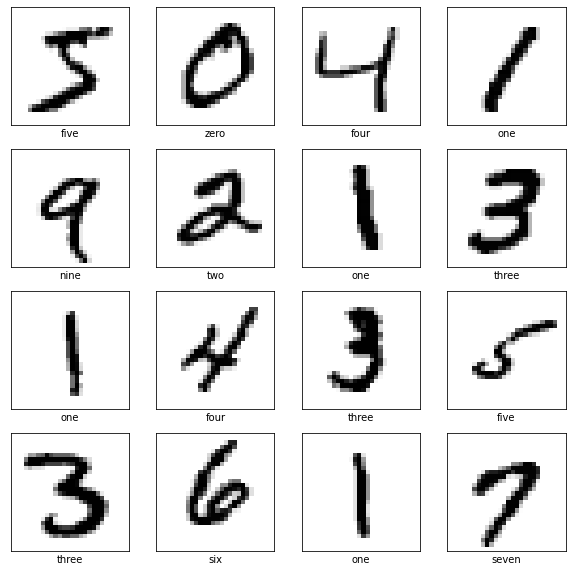

In [7]:
# ejemplos de imàgenes del dataset

# nombre de las respectivas clases
class_name = ['zero','one','two','three','four', 'five', 'six','seven', 'eight', 'nine']

#plot

plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[y_train[i]])
plt.show()

In [0]:
#preparando los datos de entrenamiento (normalizando)
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train)

###Creando el modelo

In [0]:
modelo_tf = tf.keras.Sequential([Flatten(input_shape=(28,28)),
                                 Dense(128,activation='relu'),
                                 Dense(64,activation='relu'),
                                 Dense(10, activation= 'softmax')
                                 ])

In [10]:
modelo_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compilamos el modelo
modelo_tf.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Entrenamos el modelo
modelo_tf.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2371 - accuracy: 0.9302
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0252 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0218 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [14]:
# Preparando datos para la evaluación del modelo aprendido
x_test = x_test.astype('float32')/255
y_test = to_categorical(y_test)
x_test.shape

(10000, 28, 28)

In [0]:
#haciedo reshape de los datos de entrada
x_test = x_test.reshape((-1,28,28))

In [17]:
y_test.shape

(10000, 10)

In [18]:
# realizamos algunas predicciones
predicciones = modelo_tf.predict(x_test)
print(predicciones)

[[2.3749057e-14 4.5129692e-08 3.0643736e-09 ... 9.9999952e-01
  2.1439750e-09 1.1497672e-07]
 [8.0316789e-14 1.0011654e-09 1.0000000e+00 ... 8.7347782e-15
  7.9457565e-14 5.0591695e-19]
 [5.2496643e-09 9.9997711e-01 5.2880619e-06 ... 4.3895425e-06
  1.1847957e-05 1.6185039e-08]
 ...
 [5.4179958e-18 5.0474540e-09 6.6841149e-16 ... 2.4041978e-07
  8.7375146e-10 1.7908199e-08]
 [6.8214628e-16 2.8097893e-19 7.2320581e-14 ... 9.9677465e-15
  1.9400628e-10 1.3051427e-21]
 [1.6518294e-17 8.8915338e-17 1.5625857e-16 ... 3.2102498e-20
  8.7157022e-16 1.7217752e-19]]


In [19]:
# evaluar el modelo

#calculo de precisión

test_loss, test_accuracy = modelo_tf.evaluate(x_test,y_test, verbose=2)

print("\n Precisión con datos de test = {0:.2f}%".format(test_accuracy *100.0))

313/313 - 1s - loss: 0.0973 - accuracy: 0.9775

 Precisión con datos de test = 97.75%


In [0]:
#importar imagenes desde archivos locales
from google.colab import files
from IPython.display import Image
upload = files.upload()

La siguiente es la arquitectura de la red neuronal que se implemento con tensorflow y keras y que dio una precisión en test de 97%

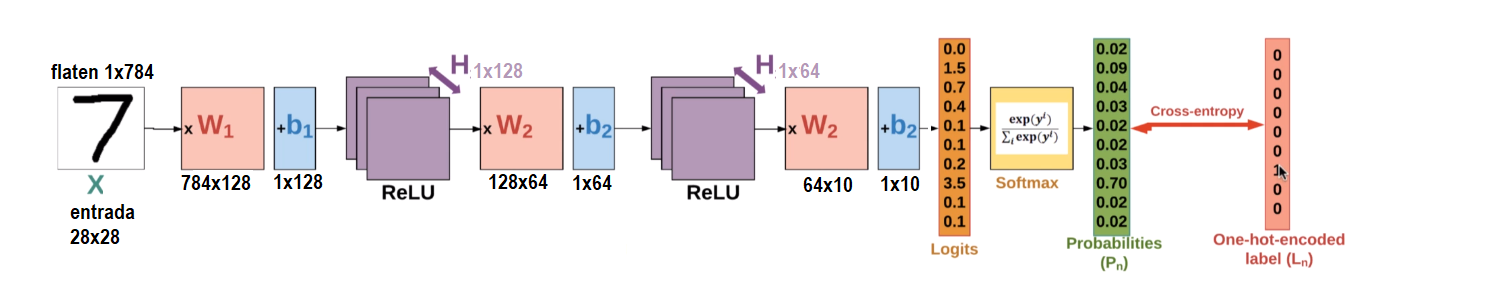

In [23]:
Image('arquitectura.png',width=2000)